In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [7]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 6.4 MB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# DATA CLEANING BELOW

In [9]:
file_path = "/Users/arshiavadhani/Desktop/MATH189/FARS_GESCRSS_Sample_2001-2019.csv"

In [10]:
df_orig = pd.read_csv(file_path, low_memory = False)

In [11]:
df_orig

,Unnamed: 0,ST_CASE,VEH_NO,PER_NO,AGE,GENDER,YEAR,SOURCE,PER_TYP,INJ_SEV,...,RACE,PREV,DR_DRINK,CDL_STAT,PREV_ACC,PREV_SUS,PREV_DWI,PREV_SPD,COUNTY,ZCTA
0,6,2.019012e+11,1.0,1.0,26.0,1.0,2019,CRSS,1.0,0.0,...,White,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,2.019012e+11,1.0,1.0,58.0,1.0,2019,CRSS,1.0,0.0,...,Black,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,2.019012e+11,1.0,2.0,45.0,2.0,2019,CRSS,2.0,0.0,...,Black,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,2.019012e+11,2.0,1.0,31.0,1.0,2019,CRSS,1.0,0.0,...,Black,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,2.019012e+11,1.0,1.0,33.0,1.0,2019,CRSS,1.0,0.0,...,Hispanic,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510193,946897,5.601320e+05,2.0,2.0,3.0,1.0,2001,FARS,2.0,2.0,...,White,1.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,82604.0
1510194,946898,5.601340e+05,1.0,1.0,61.0,2.0,2001,FARS,1.0,3.0,...,White,1.0,0.0,6.0,1.0,0.0,0.0,0.0,13.0,82510.0
1510195,946899,5.601340e+05,2.0,1.0,52.0,2.0,2001,FARS,1.0,4.0,...,White,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,82510.0
1510196,946900,5.601340e+05,2.0,2.0,51.0,1.0,2001,FARS,2.0,4.0,...,White,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,82510.0


In [12]:
keep_cols = ['ST_CASE', 'VEH_NO', 'PER_NO', 'AGE', 'GENDER', 'YEAR', 'PER_TYP', 'INJ_SEV', 'DRINKING', 'DRUGS', 'NUMOCCS', 'MAKE',
             'MOD_YEAR', 'HIT_RUN', 'BODY_TYP', 'DEFORMED', 'SPEEDREL', 'HARM_EV', 'HOUR', 'WEATHER',]

df = df_orig[keep_cols]

df["ST_CASE"] = df["ST_CASE"].astype(int)
df["TIME"] = df["HOUR"].apply(lambda x: "morning" if (x >= 5 and x <13) 
                              else ("afternoon" if x >= 13 and x < 20 else "night"))

/var/folders/hy/8rfq4p8n2kv3rpq7tdxvb7sc0000gn/T/ipykernel_82735/1904056720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ST_CASE"] = df["ST_CASE"].astype(int)
/var/folders/hy/8rfq4p8n2kv3rpq7tdxvb7sc0000gn/T/ipykernel_82735/1904056720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TIME"] = df["HOUR"].apply(lambda x: "morning" if (x >= 5 and x <13)


In [13]:
df = df.dropna()

In [14]:
feats = ["DRINKING", "DRUGS", "SPEEDREL", "WEATHER", "TIME"]
responses = ["INJ_SEV", "DEFORMED"]

drinking_map = {0:"No", 1:"Yes"}
drugs_map = {0:"No", 1:"Yes"}
speed_map = {0:"No", 1:"Yes"}
weather_map = {0:"No", 1:"Yes"}
time_map = {'morning': "morning", "afternoon": "Afternoon", "night":"Night"}

inj_sev_map = {0:"None", 1: "Possible", 2: "Minor", 3:"Major", 4:"Fatal"}
inj_sev_order = ["None", "Possible", "Minor", "Major", "Fatal"]

deformity_map = {0:"None", 2: "Minor", 4: "Moderate", 6:"Severe"}
deformity_order = ["None", "Minor", "Moderate", "Severe"]


In [15]:
df_responses = df.groupby(["ST_CASE"])[feats + responses].max()


In [16]:
df_occ = df.groupby(['ST_CASE', 'VEH_NO'])[['MOD_YEAR','NUMOCCS']].max()
df_occ = df_occ.reset_index().groupby('ST_CASE')[['NUMOCCS', 'MOD_YEAR']].max().rename(columns= {'NUMOCCS':'MAXOCCS'})
df_responses = pd.merge(df_occ, df_responses, on = 'ST_CASE', how ='inner')

In [17]:
df_responses

,MAXOCCS,MOD_YEAR,DRINKING,DRUGS,SPEEDREL,WEATHER,TIME,INJ_SEV,DEFORMED
ST_CASE,,,,,,,,,
10001,2.0,2009.0,1.0,0.0,1.0,0.0,morning,4.0,6.0
10002,1.0,1998.0,0.0,0.0,0.0,0.0,morning,4.0,6.0
10003,2.0,1992.0,0.0,0.0,1.0,0.0,night,4.0,6.0
10005,3.0,1997.0,1.0,0.0,1.0,0.0,night,0.0,6.0
10006,1.0,2003.0,0.0,0.0,0.0,1.0,afternoon,0.0,6.0
...,...,...,...,...,...,...,...,...,...
201902285122,1.0,2014.0,0.0,0.0,0.0,0.0,morning,0.0,0.0
201902285139,2.0,2017.0,0.0,0.0,0.0,1.0,afternoon,0.0,4.0
201902285160,2.0,2018.0,0.0,0.0,0.0,0.0,afternoon,0.0,4.0


In [18]:
df_responses2 = pd.get_dummies(df_responses, columns=['TIME'],drop_first = True)

In [19]:
df_responses2

,MAXOCCS,MOD_YEAR,DRINKING,DRUGS,SPEEDREL,WEATHER,INJ_SEV,DEFORMED,TIME_morning,TIME_night
ST_CASE,,,,,,,,,,
10001,2.0,2009.0,1.0,0.0,1.0,0.0,4.0,6.0,1,0
10002,1.0,1998.0,0.0,0.0,0.0,0.0,4.0,6.0,1,0
10003,2.0,1992.0,0.0,0.0,1.0,0.0,4.0,6.0,0,1
10005,3.0,1997.0,1.0,0.0,1.0,0.0,0.0,6.0,0,1
10006,1.0,2003.0,0.0,0.0,0.0,1.0,0.0,6.0,0,0
...,...,...,...,...,...,...,...,...,...,...
201902285122,1.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
201902285139,2.0,2017.0,0.0,0.0,0.0,1.0,0.0,4.0,0,0
201902285160,2.0,2018.0,0.0,0.0,0.0,0.0,0.0,4.0,0,0


In [20]:
# MODEL IMPLEMENTATION BELOW

In [21]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
df_fatality = df_responses2.copy()
df_fatality["INJ_SEV"] = df_fatality["INJ_SEV"].apply(lambda x: 1 if x == 4 else 0)
fatality_model = smf.logit('INJ_SEV ~ DRINKING + DRUGS + SPEEDREL + WEATHER+ TIME_morning + TIME_night + MOD_YEAR + MAXOCCS', data= df_fatality).fit()
print(fatality_model.summary())

Optimization terminated successfully.
         Current function value: 0.154556
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                INJ_SEV   No. Observations:               296492
Model:                          Logit   Df Residuals:                   296483
Method:                           MLE   Df Model:                            8
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3832
Time:                        16:58:11   Log-Likelihood:                -45825.
converged:                       True   LL-Null:                       -74297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -251.7625      2.979    -84.514      0.000    -257.601    -245.924
DRINKING         1.5449

In [23]:
# CONFUSION MATRIX AND ROC CURVE

# Confusion Matrix
We have created a confusion Matrix of our model to display the True Positive, True Negative, False Positive, and False Negative values for our model. We set the threshold to 0.1 and chose that based on our ROC curve pictured below.

Confusion Matrix:


||Predicted Non-Fatal | Predicted Fatal|
|-|-------------------|-----------------|
|Actual Non-Fatal |250334  |  25752     |  
|Actual Fatal |5783  |  14623|



| Column | Rate |
|-----------|------------|
| **True Positive (TP):**| 0.717 |
| **True Negative (TN):** | 0.907 |
| **False Positive (FP):** | 0.093 |
| **False Negative (FN):** | 0.283 |




The confusion matrix shows that the model has high rates of correctly indicating True Positives and True Negatives, as well as a relatively lower rate of predicting False Positives and False Negatives.

In [24]:
cm = fatality_model.pred_table(threshold= 0.1)


print("Confusion Matrix:")
print(cm)
print("\nConfusion Matrix Rate:")
print(f"True Positive (TP): {cm[1, 1]/cm[1].sum()}")
print(f"True Negative (TN): {cm[0, 0]/cm[0].sum()}")
print(f"False Positive (FP): {cm[0, 1]/cm[0].sum()}")
print(f"False Negative (FN): {cm[1, 0]/cm[1].sum()}")


Confusion Matrix:
[[250334.  25752.]
 [  5783.  14623.]]

Confusion Matrix Rate:
True Positive (TP): 0.7166029599137509
True Negative (TN): 0.9067247162116152
False Positive (FP): 0.09327528378838477
False Negative (FN): 0.28339704008624916


/Users/arshiavadhani/yes/lib/python3.10/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


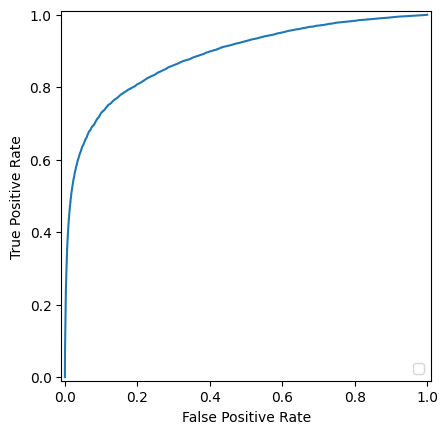

In [25]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(df_fatality['INJ_SEV'], fatality_model.predict(df_fatality))
indx = (0.1- 5e-3 <= thresholds) * (thresholds <= 0.1 + 5e-3)
tpr[indx], fpr[indx],  thresholds[indx]
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [26]:
# BACKWARDS FEATURE SELECTION BELOW

In [27]:
fatality_model_no_drinking = smf.logit('INJ_SEV ~ DRUGS + SPEEDREL + WEATHER+ TIME_morning + TIME_night + MOD_YEAR + MAXOCCS', data= df_fatality).fit()
print(fatality_model_no_drinking.summary())

Optimization terminated successfully.
         Current function value: 0.161135
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                INJ_SEV   No. Observations:               296492
Model:                          Logit   Df Residuals:                   296484
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3570
Time:                        16:58:23   Log-Likelihood:                -47775.
converged:                       True   LL-Null:                       -74297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -249.7352      2.916    -85.639      0.000    -255.451    -244.020
DRUGS            3.0052

In [28]:
fatality_model_no_drugs = smf.logit('INJ_SEV ~ DRINKING + SPEEDREL + WEATHER+ TIME_morning + TIME_night + MOD_YEAR + MAXOCCS', data= df_fatality).fit()
print(fatality_model_no_drugs.summary())

Optimization terminated successfully.
         Current function value: 0.165624
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                INJ_SEV   No. Observations:               296492
Model:                          Logit   Df Residuals:                   296484
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3391
Time:                        16:58:27   Log-Likelihood:                -49106.
converged:                       True   LL-Null:                       -74297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -262.7461      2.869    -91.577      0.000    -268.370    -257.123
DRINKING         2.0721

In [29]:
fatality_model_no_speed = smf.logit('INJ_SEV ~ DRINKING + DRUGS + WEATHER+ TIME_morning + TIME_night + MOD_YEAR + MAXOCCS', data= df_fatality).fit()
print(fatality_model_no_speed.summary())

Optimization terminated successfully.
         Current function value: 0.162691
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                INJ_SEV   No. Observations:               296492
Model:                          Logit   Df Residuals:                   296484
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3508
Time:                        16:58:31   Log-Likelihood:                -48237.
converged:                       True   LL-Null:                       -74297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -232.2802      2.863    -81.141      0.000    -237.891    -226.669
DRINKING         1.7858

In [30]:
fatality_model_no_weather = smf.logit('INJ_SEV ~ DRINKING + DRUGS + SPEEDREL+ TIME_morning + TIME_night + MOD_YEAR + MAXOCCS', data= df_fatality).fit()
print(fatality_model_no_weather.summary())

Optimization terminated successfully.
         Current function value: 0.156813
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                INJ_SEV   No. Observations:               296492
Model:                          Logit   Df Residuals:                   296484
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3742
Time:                        16:58:35   Log-Likelihood:                -46494.
converged:                       True   LL-Null:                       -74297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -261.7393      2.949    -88.764      0.000    -267.519    -255.960
DRINKING         1.5112

In [31]:
fatality_model_no_tod = smf.logit('INJ_SEV ~ DRINKING + DRUGS + SPEEDREL+ WEATHER + MOD_YEAR + MAXOCCS', data= df_fatality).fit()
print(fatality_model_no_tod.summary())

         Current function value: 0.161092
         Iterations: 35


/Users/arshiavadhani/yes/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                INJ_SEV   No. Observations:               296492
Model:                          Logit   Df Residuals:                   296485
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3571
Time:                        16:58:40   Log-Likelihood:                -47763.
converged:                      False   LL-Null:                       -74297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -251.8114      2.953    -85.262      0.000    -257.600    -246.023
DRINKING       2.0335      0.022     91.377      0.000       1.990       2.077
DRUGS          2.4932      0.030     83.127      0.0

In [32]:
fatality_model_no_modyear = smf.logit('INJ_SEV ~ DRINKING + DRUGS + SPEEDREL+ WEATHER + TIME_morning + TIME_night + MAXOCCS', data= df_fatality).fit()
print(fatality_model_no_modyear.summary())

Optimization terminated successfully.
         Current function value: 0.168256
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                INJ_SEV   No. Observations:               296492
Model:                          Logit   Df Residuals:                   296484
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3286
Time:                        16:58:45   Log-Likelihood:                -49887.
converged:                       True   LL-Null:                       -74297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.8900      0.024   -205.425      0.000      -4.937      -4.843
DRINKING         1.4789

In [33]:
fatality_model_no_maxocc = smf.logit('INJ_SEV ~ DRINKING + DRUGS + SPEEDREL+ WEATHER + TIME_morning + TIME_night + MOD_YEAR', data= df_fatality).fit()
print(fatality_model_no_maxocc.summary())

Optimization terminated successfully.
         Current function value: 0.156131
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                INJ_SEV   No. Observations:               296492
Model:                          Logit   Df Residuals:                   296484
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.3769
Time:                        16:58:49   Log-Likelihood:                -46292.
converged:                       True   LL-Null:                       -74297.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -257.3229      2.967    -86.727      0.000    -263.138    -251.508
DRINKING         1.5493

# Backwards Feature Selection
Backward feature selection was performed to evaluate the impact of individual features on the model's predictive power by iteratively removing one feature at a time and observing changes in the pseudo R² value. The goal was to discover what features were most important when calculating our overall R² values.

| Feature | R² |
|-----------|------------|
| **Full Model** | 0.3832 |
| **DRINKING** | 0.3570 |
| **DRUGS** | 0.3391 |
| **SPEEDREL** | 0.3508 |
| **WEATHER** | 0.3742 |
| **TIME OF DAY** | 0.3571 |
| **MODEL_YEAR** |  0.3286 |
| **MAXOCCS** | 0.3769 |

Based on the backwards feature selection we can see that features such as DRUGS and MODEL_YEAR dropped the most in R² values on the models ran without each feature respectively. This means that DRUGS and MODEL_YEAR were two features very statistically significant in predicting whether or not a crash was fatal based on the data provided. Conversely, models without MAXOCCS and WEATHER had a less notable impact on the overall R² values, indicating that those features did not contribute as strongly to our overall prediction. These findings offer valuable insights into which features have the greatest impact on predicting fatal crashes. Since we know which features contribute heavily to R² values, these variables should be closely monitored in predictive models related to traffic safety, while other features can be given less focus in future iterations of the model.